Problem Statement 1:
There is an automobile company Cars24X7 from India which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.

Essentially, the company wants to know: Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
df=pd.read_csv('car.csv')

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# Checking the shape of dataset 

df.shape       #There are 300 rows and 9 columns

(301, 9)

In [ ]:
# Checking the information about the datatype of features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Checking if the null values are present
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [ ]:
# Checking count the null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# Checking if duplicates are present

df.duplicated().any()

True

In [ ]:
# Checking count of duplicates 

df.duplicated().sum()

2

In [ ]:
# verifying if duplicates are removed

df.duplicated().any()

False

In [ ]:
# Checking the count of unique values in each features

df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


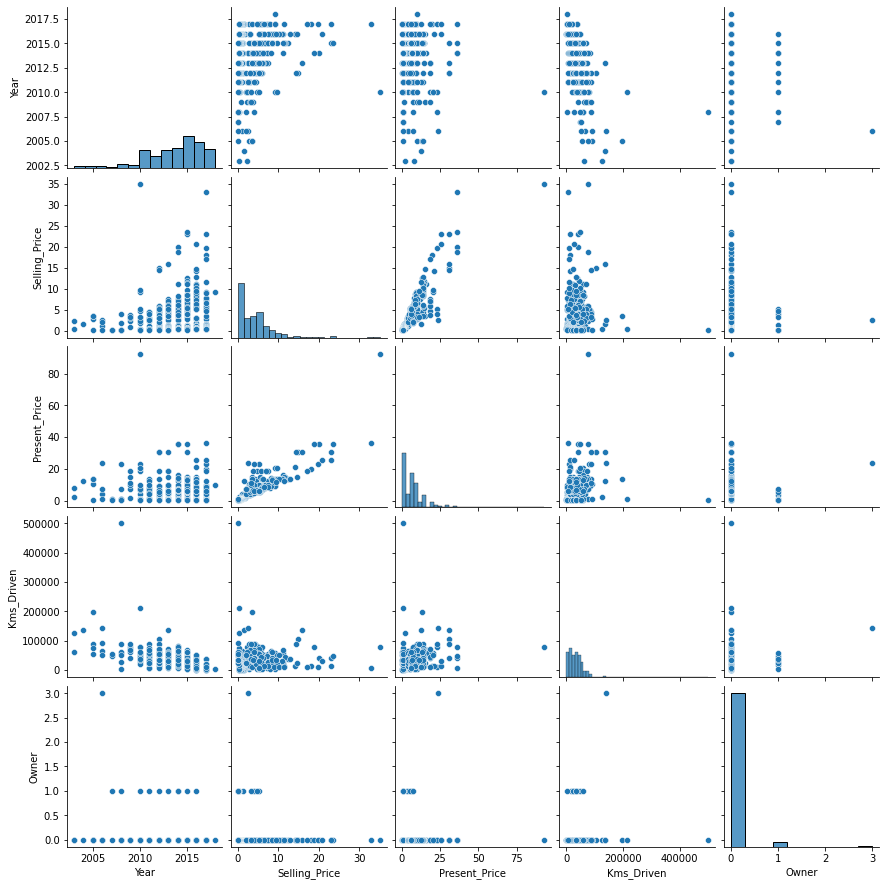

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


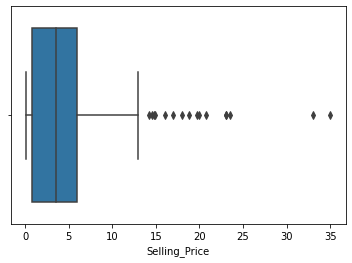

In [ ]:
sns.boxplot(df['Selling_Price'])
xlabel='Selling_Price'
plt.show()

In [ ]:
# Using value_counts to get exact count of each record in the respective feature.

for i in df.columns:
    x=df[i].value_counts(dropna=False)
    print('Columns : ',i)
    print('')
    print(x)
    print('')

Columns :  Car_Name

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

Columns :  Year

2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

Columns :  Selling_Price

0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64

Columns :  Present_Price

9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1
7.27      1
15.04     1
10.21     1
12.50     1
Name: Present_Price, Len

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


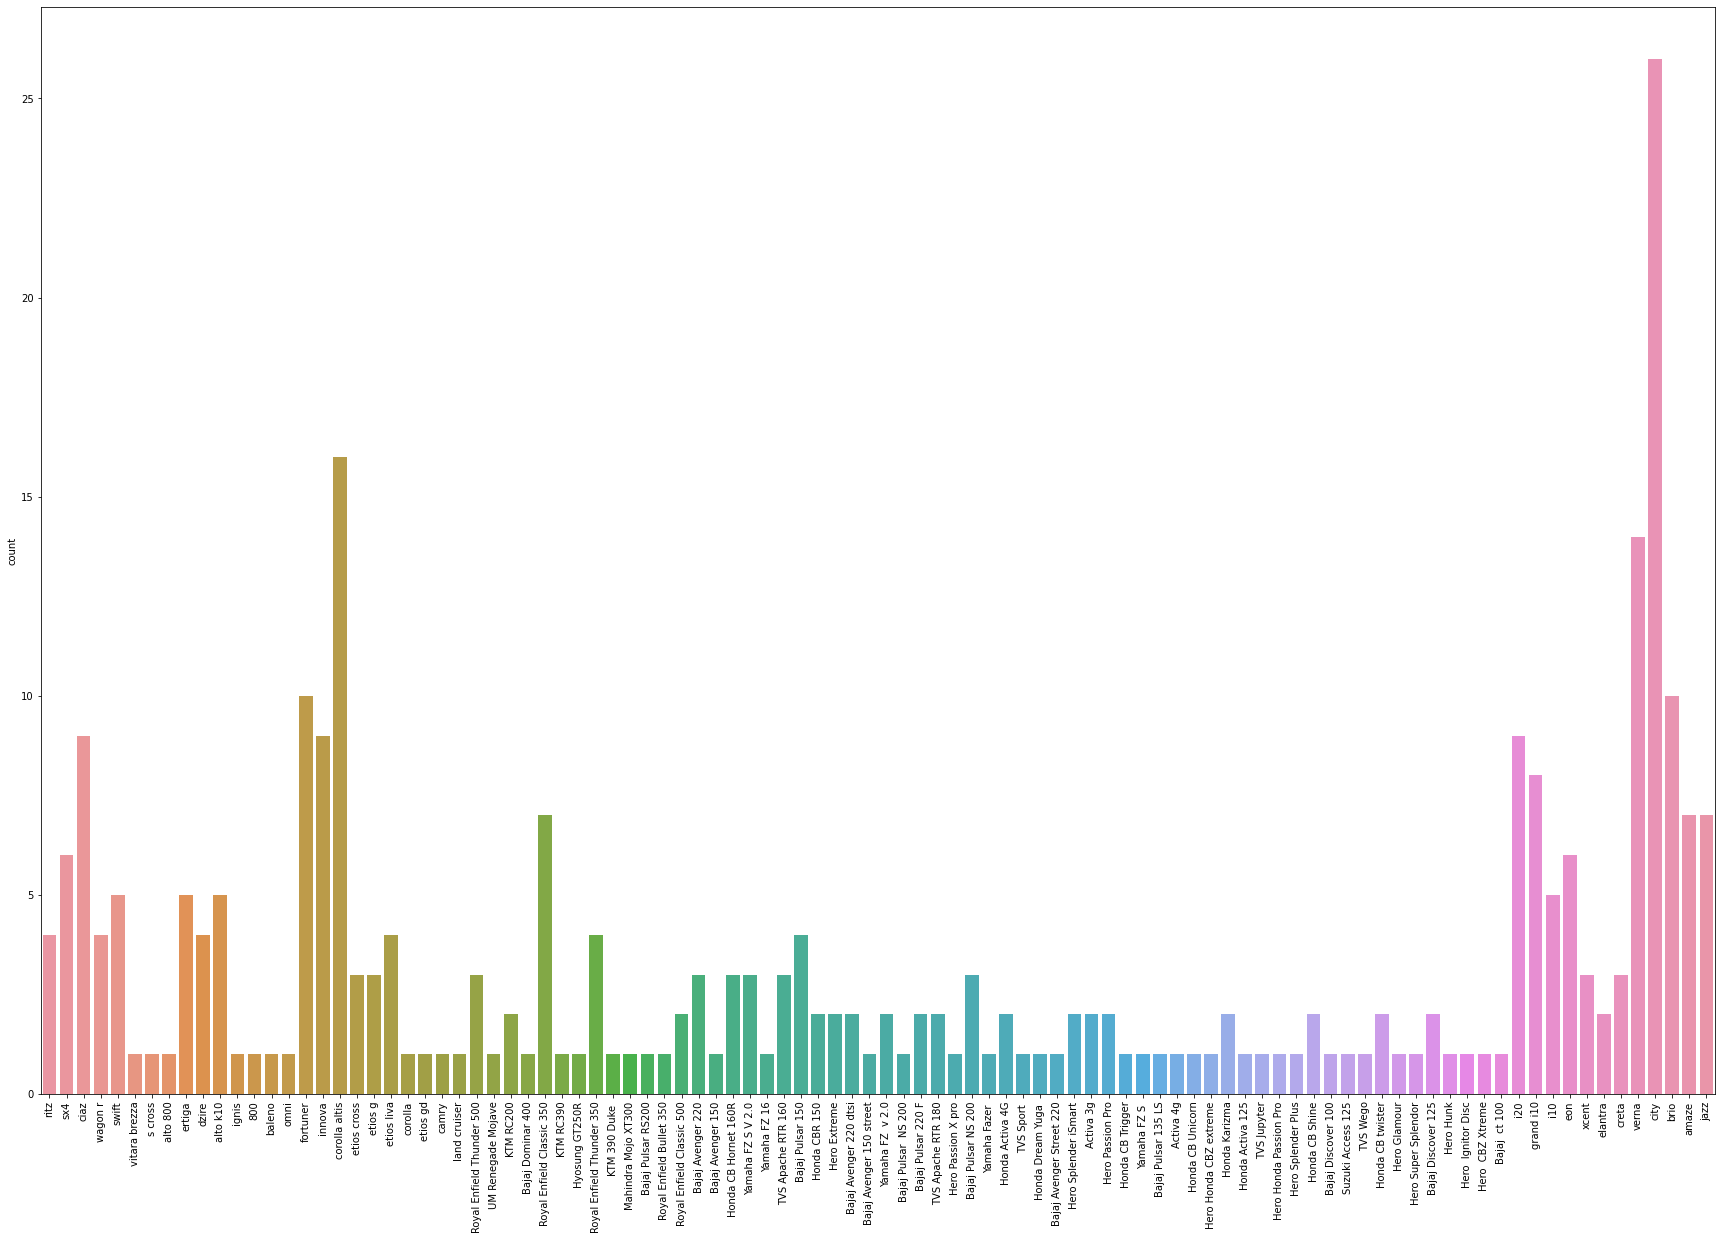

In [ ]:
# Categorical Data
plt.figure(figsize=(30,20))
ax=sns.countplot(df['Car_Name'].values,data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Observation:
The most sold vehicle is city
i20,verna,brio,amaze,fortuner,innova etc are among the top choices.
Vehicles with low frequencies such as 800,ignis,scross etc should be avoided by the CAR24*7 for better sales.
Car24*7 should focus more on vehicles with highest purchases for better growth

In [ ]:
df['Car_Name'].tail()

296    city
297    brio
298    city
299    city
300    brio
Name: Car_Name, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


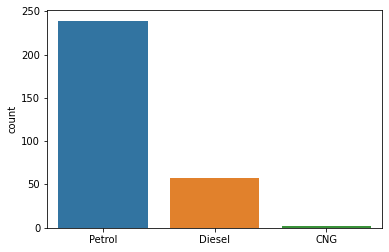

In [ ]:
sns.countplot(df['Fuel_Type'].values,data=df)
plt.show()

Observation
Majority of cars sold are petrol vehicles ,thus petrol cars are likely to sold.
Hence ,Cars24X7 from India should focus more on Petrol Vehicles

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


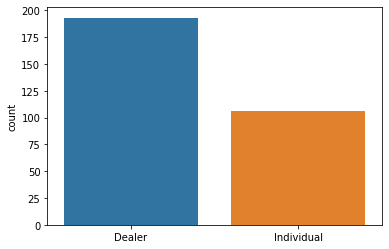

In [ ]:
sns.countplot(df['Seller_Type'].values,data=df)
plt.show()

Observation:
Most of the customer are likely to purchase from dealers, thus CARS24*7 may depend on dealers more for the sale

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


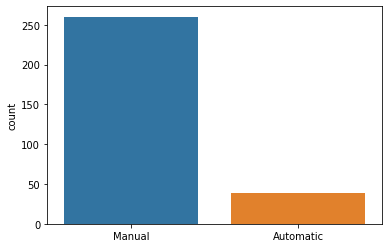

In [ ]:
sns.countplot(df['Transmission'].values,data=df)
plt.show()

Observation:
Most of the customer base is focused on Manual Transmission , thus CARS24*7 should concentrate more on manual transmission vehicles for the sale

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


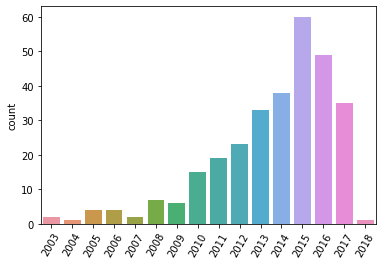

In [ ]:
# Years
year=sns.countplot(df['Year'].values,data=df)
year.set_xticklabels(year.get_xticklabels(),rotation=60)
plt.show()

Observation:
Most of the sale was done int the year 2015 and lowest sale was for 2018 and 2004
#Numeric Features

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Observation
Here there are some difference observed in the 75th percentile and the max values.
Thus there may be a chance of outliers to be present there

Plotting outliers using boxplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


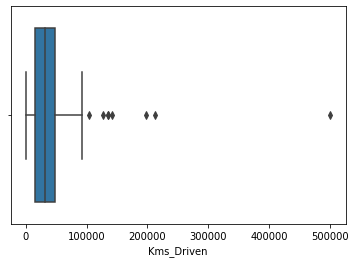

In [ ]:
# KMS Driven
sns.boxplot(df['Kms_Driven'],data=df)
xlabel='Kms_Driven'
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


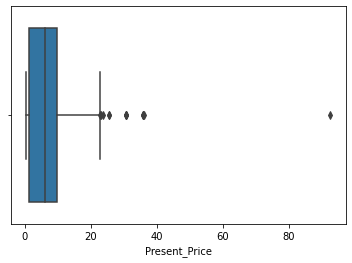

In [ ]:
# Present_Price
sns.boxplot(df['Present_Price'],data=df)
xlabel='Present_Price'
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


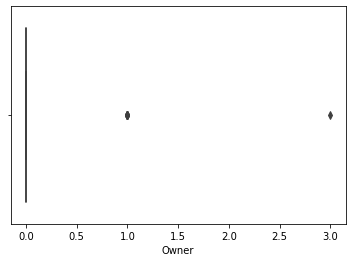

In [ ]:
# Owner
sns.boxplot(df['Owner'],data=df)
xlabel='Owner'
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


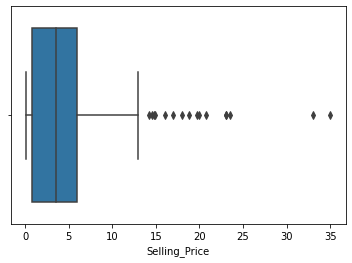

In [ ]:
# Selling price
# Present_Price
sns.boxplot(df['Selling_Price'],data=df)
xlabel='Selling_Price'
plt.show()

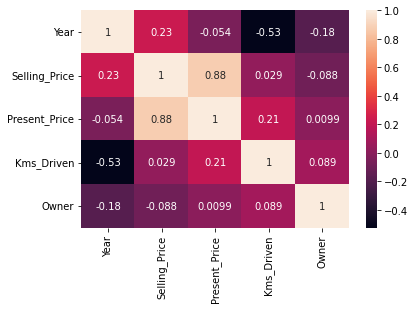

In [ ]:
# Plotting correlation

sns.heatmap(data=df.corr(),annot=True)
plt.show()

Model Building

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.5+ KB


In [ ]:
# Creating dummies to convert all Categorical Columns to Numeric.

dummydf=pd.get_dummies(df)
dummydf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
dummydf.shape

(299, 110)

In [ ]:
# Creating Dependent and Independent variables
y=dummydf['Selling_Price']

x=dummydf.drop('Selling_Price',axis=1)

In [ ]:
x.head()

,Year,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,9.54,43000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,6.87,42450,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
# Splitting the variables 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


# Feature scaling using standard scaler


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Applying Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
model=reg.fit(x_train,y_train,sample_weight=200)

In [ ]:
y_pred=model.predict(x_test)

Error Calculation

In [ ]:
from sklearn import metrics

In [ ]:
#Calculating absolute error for efficiency of model

metrics.mean_absolute_error(y_test,y_pred) 

0.6686946666666665

In [ ]:
#Calculating mean squared error for efficiency of model

metrics.mean_squared_error(y_test,y_pred)

2.392837498266666

In [ ]:
metrics.r2_score(y_test,y_pred)

0.908261460748241

Problem Statement 2: For Question2 either use read_csv if file is csv ....if file is excel then use read_excel

Chandrashekhar wants to purchase office-space. He does a detailed survey of the offices and corporate complexes in the area, and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools and workplaces; the reputation of the construction companies and builders involved in constructing the apartments; the distance of the offices from highways, freeways and important roads; the facilities around the office space and so on.

Each of these factors are quantified, normalized and mapped to values on a scale of 0 to 1. Chandrashekhar then makes a table. Each row in the table corresponds to Chandrashekhar Observations for a particular house. If Chandrashekhar has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Chandrashekhar makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.

Chandrashekhar does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive. There is one important observation which Chandrashekhar has made. The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset

df=pd.read_excel('data_final.xlsx')


In [ ]:
df

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [ ]:
# Checking the shape of dataset 

df.shape          # There are 100 rows and 2 columns


(100, 3)

In [ ]:
# Checking the information about the datatype of features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [ ]:
# Checking if the null values are present
df.isnull().any()

observation    False
feature        False
price          False
dtype: bool

In [ ]:
# Checking if duplicates are present

df.duplicated().any() #Hence our dataset is clean and ready to work upon

False

Model Building

In [ ]:
# Creating Dependent and Independent variables
y=df['price']

x=df.drop('price',axis=1)

In [ ]:
x.shape

(100, 2)

In [ ]:
y.shape

(100,)

In [ ]:
x.size

200

In [ ]:
y.size

100

Splitting data into training and testing

In [ ]:
# Splitting data into traing and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Applying Linear regression first

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Predicted value for linear model
y_pred_linear=model1.predict(x_test)
y_pred_linear

array([ 426.09146539,   58.82595194,  671.86958179,   70.59925474,
        655.72394234,  237.66554823,  588.89726222,  571.74180841,
        677.2517328 ,  698.94769006,  751.25407187,  971.69207474,
       1054.21622072, 1151.03617141,  526.05107197,  399.51785749,
        986.38053984,  118.5888131 ,  890.9059235 ,  704.55433467])

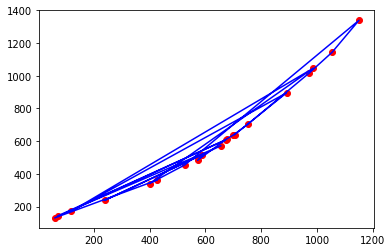

In [ ]:
#Plotting line for testing data using linear regression model
plt.scatter(y_pred_linear,y_test,color='red')
plt.plot(y_pred_linear,y_test,color='blue')
plt.show()

In [ ]:
# calculating Mean Squared error
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred_linear)

5662.710743101953

Applying polynomial features to model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial=PolynomialFeatures(degree=3)
poly=polynomial.fit_transform(x_train)
lg=LinearRegression()
lg.fit(poly,y_train)

LinearRegression()

In [ ]:
#predicted value
y_pred2=lg.predict(polynomial.fit_transform(x_test))
y_pred2

array([ 359.50360287,  131.23834372,  609.16930978,  149.98412841,
        566.72101623,  237.76303341,  520.60934004,  485.30770519,
        619.83089854,  632.50577664,  703.21376307, 1024.98728581,
       1151.24558258, 1330.85054638,  460.70580041,  340.84136488,
       1041.64246977,  170.75998438,  901.57838952,  636.04094675])

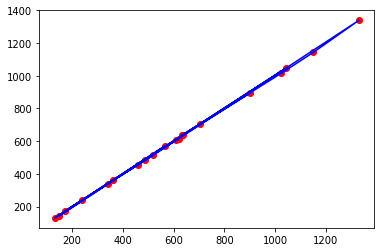

In [ ]:
# Plotting regression line using polynomial regression model
plt.scatter(y_pred2,y_test,color='red')
plt.plot(y_pred2,y_test,color='blue')
plt.show()


In [ ]:

# Checking Mean Squared error
metrics.mean_squared_error(y_test,y_pred2)

22.24181875063632

Checking the coefficient and intercept of the model

In [ ]:
model1.coef_

array([880.18136991, 655.93185759])

In [ ]:
model1.intercept_

-257.703007643353

In [ ]:
model1.score

<bound method RegressorMixin.score of LinearRegression()>

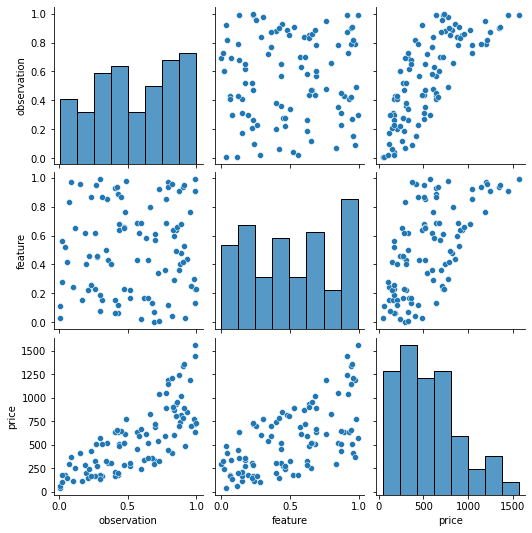

In [ ]:
sns.pairplot(df)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

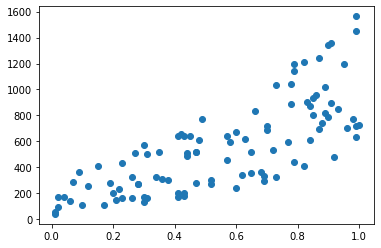

In [ ]:
plt.scatter(x['observation'],y)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

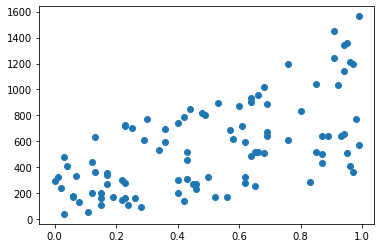

In [ ]:
plt.scatter(x['feature'],y)
plt